# Analiza podatkov 3850 največjih smučišč na svetu

Analiza podatkov bo potekala v štirih sklopih:
1. posamična analiza,
2. analiza po državah,
3. analiza po celinah,
4. analiza slovenskih smučišč.

Najprej naložimo ustrezne pakete.

In [1442]:
import pandas as pd

# naložimo razpredelnico, s katero bomo delali
smucisca = pd.read_csv(r'C:\Users\Nejc\AnalizaBesed\ProjektnaNaloga2024\smucisca.csv', index_col='položaj')

# največ 20 vrstic se vedno izpiše
pd.options.display.max_rows = 20

# omogoči celotno širino stolpca
pd.set_option('display.max_colwidth', None)  

# grafi
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Spodaj je prikazana razpredelnica, s katero bomo analizirali podatke. Najprej je prikazan položaj smučišča na svetovni lestvici, urejeni po velikosti smučišč. Ta podatek je nastavljen za indeks. Sledijo ime smučišča, celina in država, v kateri se nahaja. Kjer država ni navedena, je vrednost nastavljena na 'no data'. Nato so predstavljeni še številski podatki: ocena (od 0 do 5), višinska razlika (izražena v metrih), skupna dolžina prog ter dolžina modrih, rdečih in črnih prog posamezno (izraženo v kilometrih) ter na koncu še skupno število žičnic. Kjer številski podatki niso bili podani, je vrednost nastavljena na 'NaN' (not a number). Pri nekaterih analizah so smučišča, ki imajo za kakšen podatek vrednost 'NaN', izvzeta iz analize.
Pri ruskih smučiščih, kjer celina ni bila podana, so bile navedene regije. Na podlagi teh regij je smučišče umeščeno na evropski ali azijski del Rusije.

In [1443]:
smucisca

,ime,celina,država,ocena,višinska_razlika,proge,modre,rdeče,črne,žičnice
položaj,,,,,,,,,,
1,Les 3 Vallées – Val Thorens/Les Menuires/Méribel/Courchevel,Europe,France,4.6,2130.0,600.0,312.0,216.0,72.0,157.0
2,Les Portes du Soleil – Morzine/Avoriaz/Les Gets/Châtel/Morgins/Champéry,Europe,Switzerland,4.3,1269.0,580.0,310.0,210.0,60.0,165.0
3,4 Vallées – Verbier/La Tzoumaz/Nendaz/Veysonnaz/Thyon,Europe,Switzerland,4.3,1980.0,412.0,107.0,202.0,103.0,68.0
4,Via Lattea – Sestriere/Sauze d’Oulx/San Sicario/Claviere/Montgenèvre,Europe,Italy,4.2,1251.0,400.0,96.0,220.0,84.0,70.0
5,Zermatt/Breuil-Cervinia/Valtournenche – Matterhorn,Europe,Switzerland,4.5,2337.0,322.0,75.0,220.0,27.0,51.0
...,...,...,...,...,...,...,...,...,...,...
3789,Äänemäki – Äänekoski,Europe,Finland,2.1,65.0,0.8,0.2,0.6,0.0,2.0
3789,Birkenlift,Europe,Austria,2.1,47.0,0.8,0.8,0.0,0.0,4.0
3789,Taisten (Tesido),Europe,Italy,2.1,168.0,0.8,0.8,0.0,0.0,NaN


# <h2>1. Posamična analiza</h2>

# <h3>1.1 Splošni podatki</h3>

Oglejmo si podatke največjega smučišča na svetu.

In [1444]:
# najdem smučišče z indexom 1
najvecje_smucisce_na_svetu = smucisca.loc[1]
print(najvecje_smucisce_na_svetu)


ime                 Les 3 Vallées – Val Thorens/Les Menuires/Méribel/Courchevel
celina                                                                   Europe
država                                                                   France
ocena                                                                       4.6
višinska_razlika                                                         2130.0
proge                                                                     600.0
modre                                                                     312.0
rdeče                                                                     216.0
črne                                                                       72.0
žičnice                                                                   157.0
Name: 1, dtype: object


Spodaj so prikazana najbolje ocenjena smučišča (z oceno 4 ali več).

In [1445]:
najbolje_ocenjena_smucisca = smucisca[smucisca['ocena'] >= 4.0]
print(f'\nŠtevilo smučišč, z oceno vsaj 4, je {len(najbolje_ocenjena_smucisca)}. To predstavlja {(len(najbolje_ocenjena_smucisca)/len(smucisca) * 100):.1f} % vseh smučišč pri naši analizi.')
najbolje_ocenjena_smucisca


Število smučišč, z oceno vsaj 4, je 170. To predstavlja 4.4 % vseh smučišč pri naši analizi.


,ime,celina,država,ocena,višinska_razlika,proge,modre,rdeče,črne,žičnice
položaj,,,,,,,,,,
1,Les 3 Vallées – Val Thorens/Les Menuires/Méribel/Courchevel,Europe,France,4.6,2130.0,600.0,312.0,216.0,72.0,157.0
2,Les Portes du Soleil – Morzine/Avoriaz/Les Gets/Châtel/Morgins/Champéry,Europe,Switzerland,4.3,1269.0,580.0,310.0,210.0,60.0,165.0
3,4 Vallées – Verbier/La Tzoumaz/Nendaz/Veysonnaz/Thyon,Europe,Switzerland,4.3,1980.0,412.0,107.0,202.0,103.0,68.0
4,Via Lattea – Sestriere/Sauze d’Oulx/San Sicario/Claviere/Montgenèvre,Europe,Italy,4.2,1251.0,400.0,96.0,220.0,84.0,70.0
5,Zermatt/Breuil-Cervinia/Valtournenche – Matterhorn,Europe,Switzerland,4.5,2337.0,322.0,75.0,220.0,27.0,51.0
...,...,...,...,...,...,...,...,...,...,...
617,St. Jakob im Defereggental – Brunnalm,Europe,Austria,4.0,1283.0,23.7,5.0,12.5,6.2,7.0
785,Ruka,Europe,Finland,4.0,201.0,19.1,9.1,7.0,3.0,22.0
804,Ladurns,Europe,Italy,4.0,890.0,18.0,8.4,8.4,1.2,3.0


Katera pa so najslabše ocenjena smučišča?

In [1446]:
najslabse_ocenjena_smucisca = smucisca.sort_values('ocena').head(10)
najslabse_ocenjena_smucisca[['ime', 'celina', 'ocena']]

,ime,celina,ocena
položaj,,,
3725,Sahalie Ski Club,North America,2.0
3725,Ski Ivan – Kupres,Europe,2.0
3725,Standing Rocks,North America,2.0
3725,Ödengrub – Kemnath bei Fuhrn/Schwarzenfeld,Europe,2.0
3491,Four Lakes,North America,2.0
3491,Astenberg – Wiesing,Europe,2.0
3491,Osovje,Europe,2.0
3491,Leavenworth Ski Hill,North America,2.0
3491,Huacachina (sand ski area),South America,2.0


Opazimo, da ima Evropa poleg najbolje ocenjenih tudi najslabše ocenjena smučišča.

Koliko pa je povprečna ocena vseh smučišč, zajetih v naši analizi?

In [1447]:
# izključimo smučišča z oceno Nan
smucisca_brez_nan_pri_oceni = smucisca.dropna(subset=['ocena'])
povprecna_ocena = smucisca_brez_nan_pri_oceni['ocena'].sum() / len(smucisca_brez_nan_pri_oceni)
print(f'Povprečna ocena je {povprecna_ocena:.1f}.')

Povprečna ocena je 2.7.


Zanima nas smučišče z največjo višinsko razliko ter število smučišč z višinsko razliko, večjo od 2000 metrov.

In [1448]:
# pridobimo index smučišča z največjo višinsko razliko
index_najvecje_visinske_razlike = smucisca['višinska_razlika'].idxmax()  

# pridobimo vse podatke za to smučišče
smucisce_z_najvecjo_visinsko_razliko = smucisca.loc[index_najvecje_visinske_razlike]  

# Izpišemo vse podatke smučišča
print(smucisce_z_najvecjo_visinsko_razliko)
print(f'\nNajvečja višinska razlika je {smucisce_z_najvecjo_visinsko_razliko['višinska_razlika']} metrov.')

smucisca_nad_2000 = smucisca[smucisca['višinska_razlika'] >= 2000]
print(f'Število smučišč z višinsko razliko, večjo od 2000 metrov, je {len(smucisca_nad_2000)}.')


ime                 Zermatt/Breuil-Cervinia/Valtournenche – Matterhorn
celina                                                          Europe
država                                                     Switzerland
ocena                                                              4.5
višinska_razlika                                                2337.0
proge                                                            322.0
modre                                                             75.0
rdeče                                                            220.0
črne                                                              27.0
žičnice                                                           51.0
Name: 5, dtype: object

Največja višinska razlika je 2337.0 metrov.
Število smučišč z višinsko razliko, večjo od 2000 metrov, je 11.


Naslednji podatek je skupna dolžina prog (oznaka: proge). Zanima nas povprečna dolžina prog ter koliko smučišč ima dolžino prog čez 100 km.

In [1449]:
povprecna_dolzina_prog = smucisca['proge'].mean()
stevilo_smucisc_nad_100_km = smucisca[smucisca['proge'] > 100].shape[0]
print(f'\nPovprečna dolžina prog: {povprecna_dolzina_prog:.2f} km')
print(f'Stevilo smučišč z dolžino prog več kot 100 km: {stevilo_smucisc_nad_100_km}')


Povprečna dolžina prog: 15.47 km
Stevilo smučišč z dolžino prog več kot 100 km: 97


Poglejmo si smučišča, ki imajo največ žičnic glede na dolžino prog. Podan je tudi graf.

Pri analizi smo uporabili 3308 smučišč.


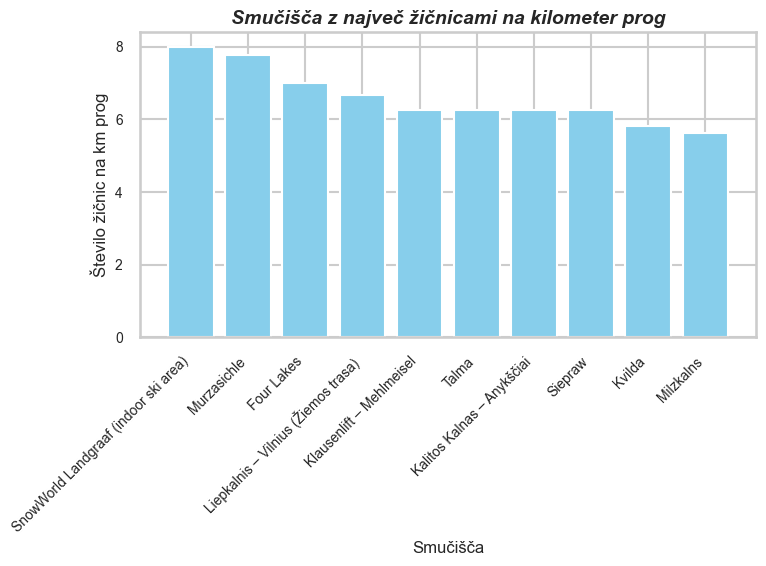

Največjih 10 smučišč po številu žičnic na kilometer prog:


,ime,žičnice,proge,razmerje_žičnic_proge
rang,,,,
1,SnowWorld Landgraaf (indoor ski area),8.0,1.0,8.00
2,Murzasichle,7.0,0.9,7.78
3,Four Lakes,7.0,1.0,7.00
4,Liepkalnis – Vilnius (Žiemos trasa),10.0,1.5,6.67
5,Klausenlift – Mehlmeisel,5.0,0.8,6.25
5,Talma,5.0,0.8,6.25
5,Kalitos Kalnas – Anykščiai,5.0,0.8,6.25
5,Siepraw,5.0,0.8,6.25
9,Kvilda,7.0,1.2,5.83


In [1450]:
# naredimo kopijo, da ne spremenimo originalne
smucisca_kopija = smucisca.copy()

# izločimo smučišča, kjer je število žičnic 0 ali NaN
smucisca_kopija = smucisca_kopija.dropna(subset=['žičnice']) 
smucisca_kopija = smucisca_kopija[smucisca_kopija['žičnice'] > 0]  
print(f'Pri analizi smo uporabili {len(smucisca_kopija)} smučišč.')

# izračunamo razmerje žičnic/proge, uredimo
smucisca_kopija['razmerje_žičnic_proge'] = smucisca_kopija['žičnice'] / smucisca_kopija['proge']
smucisca_kopija['razmerje_žičnic_proge'] = smucisca_kopija['razmerje_žičnic_proge'].round(2)
urejena_smucisca_po_razmerju_zicnic_proge = smucisca_kopija.sort_values('razmerje_žičnic_proge', ascending=False)
urejena_smucisca_po_razmerju_zicnic_proge['rang'] = urejena_smucisca_po_razmerju_zicnic_proge['razmerje_žičnic_proge'].rank(method='min', ascending=False).astype(int)

# odstranimo položaj in nastavimo rang kot nov index
urejena_smucisca_po_razmerju_zicnic_proge = urejena_smucisca_po_razmerju_zicnic_proge[['ime', 'žičnice', 'proge', 'razmerje_žičnic_proge', 'rang']]
urejena_smucisca_po_razmerju_zicnic_proge = urejena_smucisca_po_razmerju_zicnic_proge.set_index('rang')

# graf
plt.figure(figsize=(8, 6))
plt.bar(urejena_smucisca_po_razmerju_zicnic_proge['ime'].head(10), urejena_smucisca_po_razmerju_zicnic_proge['razmerje_žičnic_proge'].head(10), color='skyblue')
plt.title('Smučišča z največ žičnicami na kilometer prog', fontsize=14, fontweight='bold', style='italic')
plt.xlabel('Smučišča', fontsize=12)
plt.ylabel('Število žičnic na km prog', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print("Največjih 10 smučišč po številu žičnic na kilometer prog:")
urejena_smucisca_po_razmerju_zicnic_proge.head(10)



Smiselno bi si bilo ogledati dolžine modrih, rdečih in črnih prog največjih 10 smučišč.

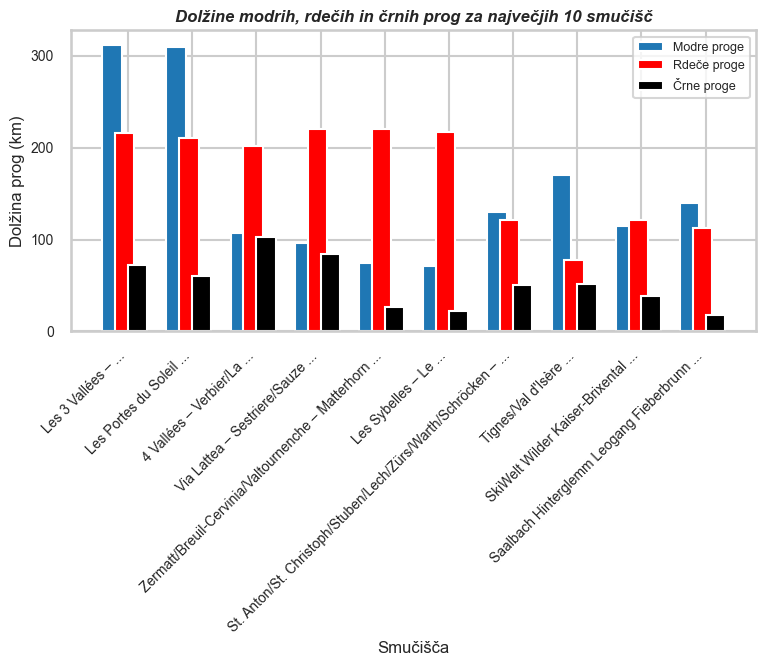

In [1451]:
# poiščemo največjih 10 smučišč na svetu
najvecjih_10_smucisc = smucisca.sort_values('proge', ascending=False).head(10)

# ustvarimo x-koordinato
x = np.arange(len(najvecjih_10_smucisc))

# velikost
plt.figure(figsize=[8, 7])

# narišemo vse tri stolpce za vsako državo
plt.bar(x, najvecjih_10_smucisc['modre'], color='#1f77b4', width=0.3, label='Modre proge')
plt.bar(x + 0.2, najvecjih_10_smucisc['rdeče'], color='red', width=0.3, label='Rdeče proge')
plt.bar(x + 0.4, najvecjih_10_smucisc['črne'], color='black', width=0.3, label='Črne proge')

# podam imena osi
plt.xlabel('Smučišča', fontsize=12)
plt.ylabel('Dolžina prog (km)', fontsize=12)
plt.title('Dolžine modrih, rdečih in črnih prog za največjih 10 smučišč', fontsize=12, fontweight='bold', fontstyle='italic')

# oznake na x osi, y os velikost
plt.xticks(x + 0.25, najvecjih_10_smucisc['ime'].str.split().str[:4].str.join(' ') + ' ...', rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# legenda
plt.legend(fontsize=9)

plt.tight_layout()
plt.show()


Opazimo, da se največjih 10 smučišč najbolj razlikuje v dolžini modrih prog ter najmanj v dolžini črnih.

Sedaj nas zanima smučišče z največjim procentom najtežjih, torej črnih prog. Prikazali bomo s tortnim diagramom.

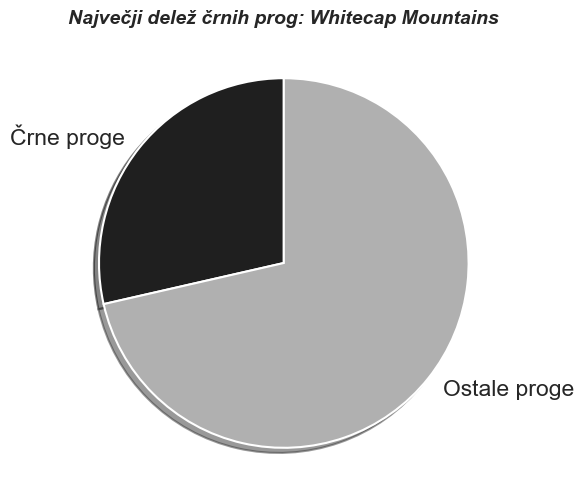

Smučišče z največjim deležem črnih prog je Whitecap Mountains, ki ima 28.6 % črnih prog.


In [1452]:
# izračunajmo najprej procent črnih prog za vsako smučišče
smucisca_copy = smucisca.copy()
smucisca_copy = smucisca_copy.dropna(subset=['proge', 'črne']) 
smucisca_copy['% črnih prog'] = (smucisca_copy['črne'] / smucisca_copy['proge']) * 100

# poiščemo to smučišče
najvecji_procent_crnih = smucisca_copy.iloc[smucisca_copy['% črnih prog'].idxmax()]
smucisce_z_najvec_crnimi_progami = najvecji_procent_crnih['ime']
procent_crnih = najvecji_procent_crnih['% črnih prog']

# priprava podatkov
labels = ['Črne proge', 'Ostale proge']
sizes = [procent_crnih, 100 - procent_crnih]
colors = ['#1f1f1f', '#b0b0b0']  

# nastavitve grafa
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, shadow=True, pctdistance=0.5, wedgeprops={'edgecolor': 'white'})
plt.title(f'Največji delež črnih prog: {smucisce_z_najvec_crnimi_progami}', fontsize=14, fontweight='bold', style='italic')
plt.show()

print(f"Smučišče z največjim deležem črnih prog je {smucisce_z_najvec_crnimi_progami}, ki ima {procent_crnih:.1f} % črnih prog.")


Za konec razdelka si oglejmo še smučišča z največ žičnicami.

In [1453]:
smucisca_najvec_zicnic = smucisca.sort_values('žičnice', ascending=False).head(10)
smucisca_najvec_zicnic['žičnice'] = smucisca_najvec_zicnic['žičnice'].astype(int) # znebimo decimalk
print(smucisca_najvec_zicnic[['ime', 'celina', 'žičnice']].to_string(index=False))


                                                                                    ime celina  žičnice
                Les Portes du Soleil – Morzine/Avoriaz/Les Gets/Châtel/Morgins/Champéry Europe      165
                            Les 3 Vallées – Val Thorens/Les Menuires/Méribel/Courchevel Europe      157
                                                                     Tignes/Val d'Isère Europe       85
                 St. Anton/St. Christoph/Stuben/Lech/Zürs/Warth/Schröcken – Ski Arlberg Europe       85
Espace Diamant – Les Saisies/Notre-Dame-de-Bellecombe/Praz sur Arly/Flumet/Crest-Voland Europe       82
                                                                   Megève/Saint-Gervais Europe       81
                                                        SkiWelt Wilder Kaiser-Brixental Europe       81
                                                                   Val Gardena (Gröden) Europe       79
                 Grandvalira – Pas de la Casa/Grau Roig/Soldeu/E

Opazimo, da imajo Evropska smučišča največ žičnic .

# <h3>1.2 Hipoteze in ugotovitve</h3>

<h4>Hipoteza 1: Število žičnic se z večanjem višinske razlike povečuje.</h4>








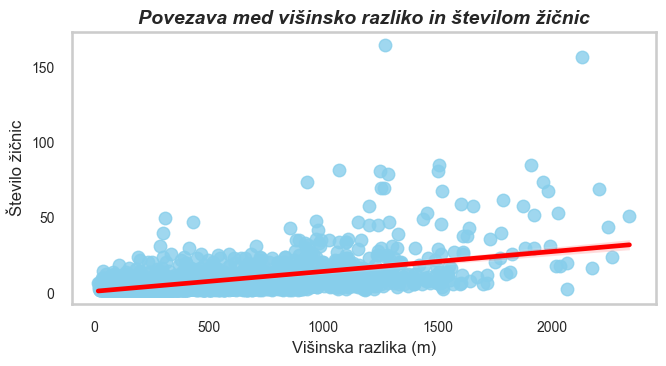

In [1454]:
# graf
plt.figure(figsize=(7, 4))
sns.regplot(x='višinska_razlika', y='žičnice', data=smucisca, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})
plt.title('Povezava med višinsko razliko in številom žičnic', fontsize=14, fontweight='bold', style='italic')
plt.xlabel('Višinska razlika (m)', fontsize=12)
plt.ylabel('Število žičnic', fontsize=12)
plt.grid()
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.tight_layout()
plt.show()


Hipotezo nam graf potrdi. Ob nižji višinski razliki je število žičnic načeloma dosti majhno, z večanjem višinske razlike pa se poveča število žičnic. To nam potrdi tudi naslednja razpredelnica.

In [1455]:
# ustvarimo razrede višinske razlike (po 400 m)
smucisca_copy_visinski_razred = smucisca.copy()
smucisca_copy_visinski_razred = smucisca_copy_visinski_razred.dropna(subset=['višinska_razlika', 'žičnice'])
bins = [0, 400, 800, 1200, 1600, 2000, 2400] 
labels = ['(0-400) m', '(400-800) m', '(800-1200) m', '(1200-1600) m', '(1600-2000) m', '(2000-2400) m']
smucisca_copy_visinski_razred['višinski_razred'] = pd.cut(smucisca_copy_visinski_razred['višinska_razlika'], bins=bins, labels=labels, right=False)

# izračunamo povprečno število žičnic v posameznem razredu višinske razlike
povprecje_zicnic_v_visinskem_razredu = round(smucisca_copy_visinski_razred.groupby('višinski_razred', observed=False)['žičnice'].mean().reset_index(), 1)
povprecje_zicnic_v_visinskem_razredu.index += 1

print("Povprečno število žičnic po razredih višinske razlike (po 400 m):")
povprecje_zicnic_v_visinskem_razredu

Povprečno število žičnic po razredih višinske razlike (po 400 m):


,višinski_razred,žičnice
1,(0-400) m,4.1
2,(400-800) m,7.2
3,(800-1200) m,12.9
4,(1200-1600) m,20.4
5,(1600-2000) m,33.8
6,(2000-2400) m,43.1


Po tej razpredelnici se še lepše vidi, da je v vsakem višjem višinskem razredu čedalje več žičnic. 
Moja 1. hipoteza je _POTRJENA_.

<h4>Hipoteza 2: Daljše proge so bolje ocenjene kot krajše.</h4>
Ideja za to hipotezo je, da daljše proge omogočajo boljšo izkušnjo smučanja, saj ponujajo večjo raznolikost ter več priložnosti za uživanje v naravi in izzivih, ki jih smučišča nudijo.

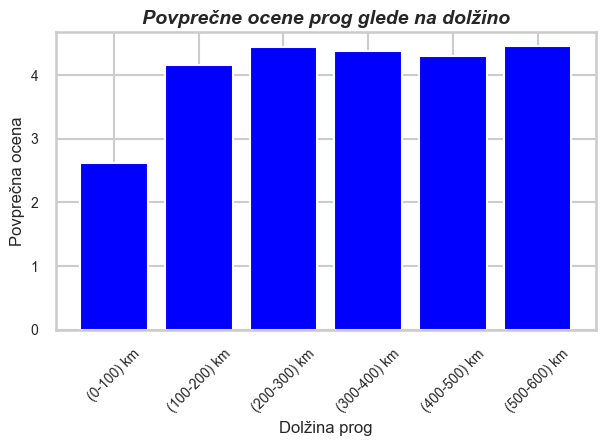

In [1456]:
# naredimo kopijo, da ne spremenimo originalnih podatkov
smucisca_kopija2 = smucisca.copy()

# omejimo
bins = [0, 100, 200, 300, 400, 500, 600]
oznake = ['(0-100) km', '(100-200) km', '(200-300) km', '(300-400) km', '(400-500) km', '(500-600) km']
smucisca_kopija2['dolžina_razred'] = pd.cut(smucisca_kopija2['proge'], bins=bins, labels=oznake)
povprecne_ocene = smucisca_kopija2.groupby('dolžina_razred', observed=False)['ocena'].mean().reset_index()

# graf    
plt.bar(povprecne_ocene['dolžina_razred'], povprecne_ocene['ocena'], color='blue')
plt.title('Povprečne ocene prog glede na dolžino', fontsize=14, fontweight='bold', style='italic')
plt.xlabel('Dolžina prog', fontsize=12)
plt.ylabel('Povprečna ocena', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.tight_layout()
plt.show()





Kot je razvidno z grafa, je sprememba ocene najbolj opazna pri prehodu s prvega na drugi stolpec. Po tej točki pa so razlike med ocenami zanemarljive in ne stalno naraščajoče ali padajoče. Tako lahko zaključimo, da je ta hipoteza _OVRŽENA_. Razlog za to je, da tudi krajše proge predstavljajo dovolj izzivov tudi za precej izkušene smučarje.

<h4>Hipoteza 3: Večje število žičnic je povezano z višjo oceno smučišča.</h4>
Obstaja domneva, da smučišča z večjim številom žičnic ponujajo boljšo dostopnost in tako prejemajo višje ocene.

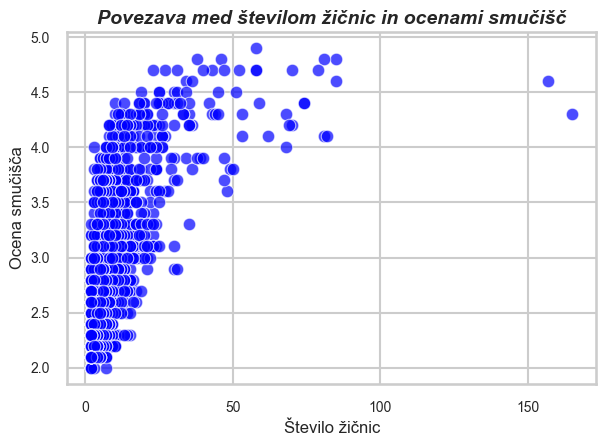

In [1457]:
smucisca_kopija_4 = smucisca.copy()
smucisca_kopija_4 = smucisca_kopija_4.dropna(subset=['ocena', 'žičnice'])

# izračunamo povezavo med številom žičnic in ocenami
povezava = smucisca_kopija_4['žičnice'].corr(smucisca_kopija_4['ocena'])

# graf
sns.scatterplot(data=smucisca_kopija_4, x='žičnice', y='ocena', color='blue', alpha=0.7)
plt.title('Povezava med številom žičnic in ocenami smučišč',fontweight='bold', style='italic', fontsize=14)
plt.xlabel('Število žičnic', fontsize=12)
plt.ylabel('Ocena smučišča', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()




Iz grafa je lepo razvidno, da so najnižje ocene pri smučiščih z najmanjšim številom žičnic, z večanjem števila teh pa se viša tudi ocena. Ta hipoteza je torej _POTRJENA_.

<h4>Hipoteza 4: Vsaj 90 % najbolje ocenjenih prog (ocena nad 4) se nahaja v Evropi.</h4>

In [1458]:
stevilo_evropskih = najbolje_ocenjena_smucisca[najbolje_ocenjena_smucisca['celina'] == 'Europe'].shape[0] # shape[0] je število vrstic
skupno_stevilo = najbolje_ocenjena_smucisca.shape[0]
procent_evrope = (stevilo_evropskih / skupno_stevilo) * 100

print(f'Skupno število najbolje ocenjenih prog: {skupno_stevilo}')
print(f'Število najbolje ocenjenih prog v Evropi: {stevilo_evropskih}')
print(f'Procent najbolje ocenjenih prog v Evropi: {procent_evrope:.1f}%')

if procent_evrope >= 90:
    print("Hipoteza 4 je potrjena: vsaj 90 % najbolje ocenjenih prog se nahaja v Evropi.")
else:
    print(f"\nHipoteza 4 je OVRŽENA.")


Skupno število najbolje ocenjenih prog: 170
Število najbolje ocenjenih prog v Evropi: 135
Procent najbolje ocenjenih prog v Evropi: 79.4%

Hipoteza 4 je OVRŽENA.


Razlog za ovrženo hipotezo je verjetno v popularnosti predvsem severnoameriških smučišč.

# <h2>2. Analiza po državah</h2>


<h3>2.1 Splošni podatki</h3>

Za začetek tega razdelka si oglejmo države z največ registriranimi smučišči. Prikazano je tudi v obliki stolpičnega diagrama.

In [1459]:
# preštejemo smučišča za vsako državo
smucisca_po_drzavah = smucisca.groupby('država').size().reset_index(name='število_smučišč')

# uredimo po številu smučišč od največ do najmanj
smucisca_po_drzavah = smucisca_po_drzavah.sort_values('število_smučišč', ascending=False)

# nastavimo nov index, ki se začne z 1
smucisca_po_drzavah.reset_index(drop=True, inplace=True)
smucisca_po_drzavah.index += 1  

# prikažemo prvih 10 držav
najvec_smucisc_po_drzavah = smucisca_po_drzavah.head(10)
najvec_smucisc_po_drzavah


,država,število_smučišč
1,USA,462
2,Japan,368
3,Austria,312
4,Germany,253
5,Switzerland,252
6,Italy,243
7,France,223
8,Canada,213
9,Czech Republic,204
10,Sweden,161


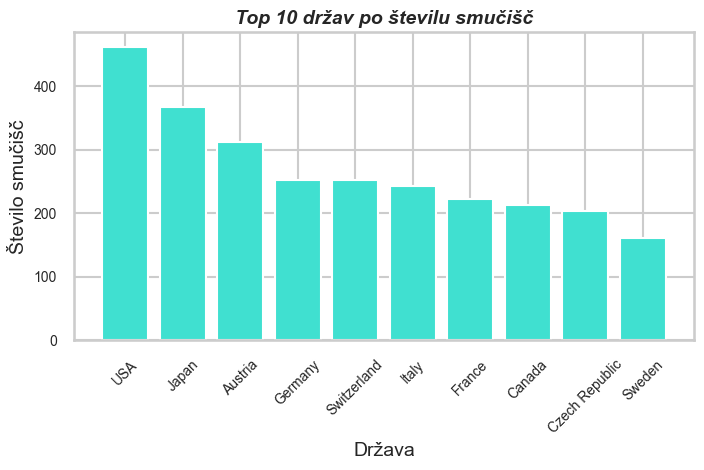

In [1460]:
# ustvarimo stolpični diagram
plt.figure(figsize=(8, 4))
plt.bar(najvec_smucisc_po_drzavah['država'], najvec_smucisc_po_drzavah['število_smučišč'], color='turquoise')
plt.xlabel('Država', fontsize=14)
plt.ylabel('Število smučišč', fontsize=14)
plt.title('Top 10 držav po številu smučišč',fontweight='bold', style='italic', fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.show()

Sedaj nas zanimajo države z najdaljšo skupno dolžino smučarskih prog.

In [1461]:
# skupna dolžina prog po državah
dolzina_prog_po_drzavah = smucisca.groupby('država')['proge'].sum()
dolzina_prog_po_drzavah = dolzina_prog_po_drzavah.sort_values(ascending=False)

# indeks
dolzina_prog_po_drzavah = dolzina_prog_po_drzavah.reset_index()
dolzina_prog_po_drzavah.index += 1  

najdaljse_dolzina = dolzina_prog_po_drzavah.head(10)
najdaljse_dolzina



,država,proge
1,USA,11188.0
2,France,9100.9
3,Austria,7173.1
4,Switzerland,6701.5
5,Italy,5179.1
6,Canada,4013.2
7,Japan,3083.8
8,Norway,1397.4
9,Sweden,1191.6
10,Spain,1178.4


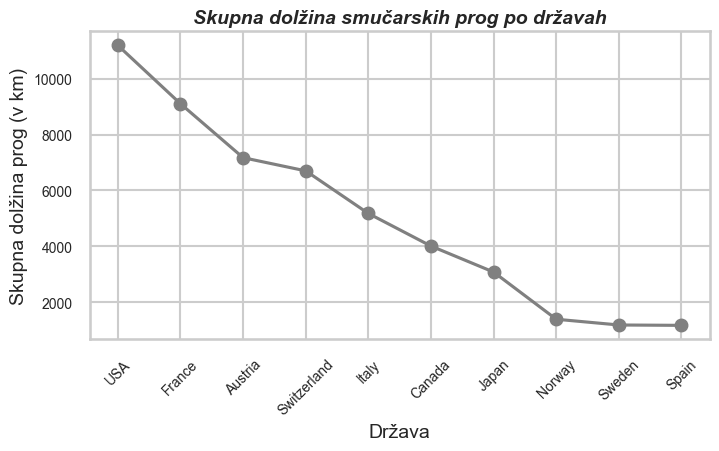

In [1462]:
# graf
plt.figure(figsize=(8, 4))
plt.plot(najdaljse_dolzina['država'], najdaljse_dolzina['proge'], marker='o', color='gray')
plt.title('Skupna dolžina smučarskih prog po državah', fontweight='bold', style='italic', fontsize=14)
plt.xlabel('Država', fontsize=14)
plt.ylabel('Skupna dolžina prog (v km)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


<h3>2.2 Hipoteze in ugotovitve</h3>

<h4>Hipoteza 1: Države z boljšo smučarsko infrastrukturo so bolje ocenjene.</h4>
Smučarska infrastruktura vključuje vse osnovne objekte in naprave, ki omogočajo nemoteno delovanje smučišča, kot so smučarske proge, žičnice, vlečnice ter sistemi za zasneževanje in urejanje prog. Ker imamo le podatke o dolžini smučarskih prog in številu žičnic, bomo naredili izračun na podlagi tega.

In [1463]:
smucisca_zicnice_proge_ocene_brez_nan = smucisca.dropna(subset=['žičnice', 'proge', 'ocena'])

# kot infrastrukturni indeks nastavimo število žičnic na kilometer prog
infrastruktura_po_drzavah = smucisca_zicnice_proge_ocene_brez_nan.groupby('država').agg({'žičnice': 'sum', 'proge': 'sum'})
infrastruktura_po_drzavah['infrastrukturni_indeks'] = (infrastruktura_po_drzavah['žičnice'] / infrastruktura_po_drzavah['proge']).round(1)

povprecne_ocene_drzave = smucisca_zicnice_proge_ocene_brez_nan.groupby('država')['ocena'].mean().round(1)
rezultati_infrastrukture = infrastruktura_po_drzavah.join(povprecne_ocene_drzave, on='država')
top_10_infrastruktura = rezultati_infrastrukture.sort_values('infrastrukturni_indeks', ascending=False).head(10)
print(f"\nTop 10 držav glede na infrastrukturni indeks in povprečno oceno:\n")
print(top_10_infrastruktura[['infrastrukturni_indeks', 'ocena']])



Top 10 držav glede na infrastrukturni indeks in povprečno oceno:

                      infrastrukturni_indeks  ocena
država                                             
Netherlands                              8.0    3.2
Lithuania                                5.7    2.3
Greenland                                3.8    2.1
Latvia                                   3.4    2.2
United Arab Emirates                     2.0    3.0
Hungary                                  1.8    2.4
South Africa                             1.8    2.2
Belgium                                  1.7    2.2
Albania                                  1.5    2.2
Estonia                                  1.3    2.3


Kot opazimo, je hipoteza _OVRŽENA_, saj ocena ne pada enakomerno kot število žičnic na kilometer prog (infrastrukturni_indeks).

Razlog za to je verjetno v ceni smučarskih vozovnic ali pa morda v smučarski superstrukturi, ki vključuje dodatne storitve in objekte, kot so smučarske šole, hoteli, restavracije, parkirišča in druge turistične ponudbe. Kakovost teh storitev lahko vpliva na splošno uporabniško izkušnjo in zadovoljstvo smučarjev, kar se lahko odraža v višjih ocenah smučišč.

<h4>Hipoteza 2: Najvišje ocenjena so avstrijska, francoska in italijanska smučišča.</h4>Razlog za to bi lahko bil v popularnosti smučišč na teh območij na koledarju svetovnega pokala v alpskem smučanju.

In [1464]:
ocene_drzav = smucisca_brez_nan_pri_oceni.groupby('država')['ocena'].mean().reset_index(name='povprečna_ocena')
top_ocene_drzav = ocene_drzav.sort_values('povprečna_ocena', ascending=False).head(10)
top_ocene_drzav['povprečna_ocena'] = top_ocene_drzav['povprečna_ocena'].round(1)

print(top_ocene_drzav.to_string(index=False))


              država  povprečna_ocena
       Liechtenstein              3.5
             Andorra              3.4
         Netherlands              3.2
          Tajikistan              3.1
          Uzbekistan              3.1
           Australia              3.1
             Georgia              3.1
               Spain              3.0
            Mongolia              3.0
United Arab Emirates              3.0


Tudi ta hipoteza je _OVRŽENA_. Tukaj so njihove dejanske povprečne ocene.

In [1465]:
izbrane_drzave = ['Italy', 'France', 'Austria']
ocene_izbrane = ocene_drzav[ocene_drzav['država'].isin(izbrane_drzave)]
ocene_izbrane = ocene_izbrane.round(1)

print(ocene_izbrane.to_string(index=False))


 država  povprečna_ocena
Austria              2.9
 France              2.8
  Italy              2.9


# <h2>3. Kontinenti</h2>


<h3>3.1 Splošni podatki</h3>

Najprej si oglejmo število smučišč po celinah.

In [1466]:
smucisca_po_celinah = smucisca['celina'].value_counts().reset_index()
smucisca_po_celinah.index += 1
smucisca_po_celinah.columns = ['Celina', 'Število smučišč']
smucisca_po_celinah

,Celina,Število smučišč
1,Europe,2512
2,North America,678
3,Asia,588
4,South America,33
5,Australia and Oceania,33
6,Africa,6


Oglejmo si skupno dolžino prog po celinah, povprečno oceno ter povprečno višinsko razliko.

In [1467]:
analiza_po_celinah = smucisca.groupby('celina').agg({
    'proge': 'sum',          
    'ocena': 'mean',                  
    'višinska_razlika': 'mean'         
}).reset_index()

analiza_po_celinah.sort_values('proge', ascending=False, inplace=True)

analiza_po_celinah.columns = ['Celina', 'Skupna dolžina prog', 'Povprečna ocena', 'Povprečna višinska razlika']

analiza_po_celinah['Skupna dolžina prog'] = analiza_po_celinah['Skupna dolžina prog'].round(1)
analiza_po_celinah['Povprečna ocena'] = analiza_po_celinah['Povprečna ocena'].round(1)
analiza_po_celinah['Povprečna višinska razlika'] = analiza_po_celinah['Povprečna višinska razlika'].round(1)

print(analiza_po_celinah.to_string(index=False))


               Celina  Skupna dolžina prog  Povprečna ocena  Povprečna višinska razlika
               Europe              37776.8              2.6                       388.2
        North America              15205.4              2.8                       296.0
                 Asia               5181.4              2.7                       369.7
        South America                694.1              2.8                       562.5
Australia and Oceania                692.1              2.9                       429.0
               Africa                 18.2              2.3                       290.3


Najdaljšo skupno dolžino prog ima seveda Evropa, ki ima daleč največ smučišč. Najvišja povprečna ocena pripada Avstraliji, kar je precej presenetljivo, saj nimajo veliko smučišč. Povprečna višinska razlika pa je največja v gorati Južni Ameriki. 

<h3>3.2 Hipoteze in ugotovitve</h3>

<h4>Hipoteza 1: Smučišča v državah na skrajnem severu Evrope, Azije in Severne Amerike imajo v poprečju višjo višinsko razliko kot ostale.</h4>

In [1468]:
smucisca_brez_nan_pri_visinski_razliki = smucisca.dropna(subset=['višinska_razlika'])

severne_drzave = [
    'Norway', 'Sweden', 'Finland', 'Denmark', 'Iceland',
    'Russia', 'Canada', 'USA', 'Japan'
]
skupne_visinske_razlike_severne = 0
skupne_visinske_razlike_ostale = 0
severne_smucisca = []
ostale_smucisca = []

for smucisce in smucisca_brez_nan_pri_visinski_razliki.itertuples(index=False):
    if smucisce.država in severne_drzave:
        skupne_visinske_razlike_severne += smucisce.višinska_razlika
        severne_smucisca.append(smucisce)
    else:
        skupne_visinske_razlike_ostale += smucisce.višinska_razlika
        ostale_smucisca.append(smucisce)

povprecje_severne = skupne_visinske_razlike_severne / len(severne_smucisca)
povprecje_ostale = skupne_visinske_razlike_ostale / len(ostale_smucisca)

print(f'Povprečje severnih je {povprecje_severne:.1f}, ostalih pa {povprecje_ostale:.1f}.')


Povprečje severnih je 291.0, ostalih pa 425.3.


Hipoteza je _OVRŽENA_. To verjetno zaradi dejstva, da ni gorat le sever celin, temveč tudi srednja Evropa, ZDA, Južna Amerika in druga območja, ki so nekoliko bolj turistično razvita.

<h4>Hipoteza 2: Smučišča v evropskih državah prejemajo višje ocene v primerjavi s smučišči na drugih celinah.</h4>
Evropa je znana po svojih smučiščih in tradiciji smučanja, kar lahko vpliva na višje ocene.

In [1469]:
evropska_smucisca = smucisca[smucisca['celina'] == 'Europe']
druga_smucisca = smucisca[smucisca['celina'] != 'Europe']

povprecna_ocena_evrope = evropska_smucisca['ocena'].mean()
povprecna_ocena_drugih = druga_smucisca['ocena'].mean()

print(f'Povprečna ocena evropskih smučišč: {povprecna_ocena_evrope:.2f}')
print(f'Povprečna ocena smučišč na drugih celinah: {povprecna_ocena_drugih:.2f}')

if povprecna_ocena_evrope > povprecna_ocena_drugih:
    print("Hipoteza 2 je potrjena: Smučišča v evropskih državah prejemajo višje ocene.")
else:
    print(f"\nHipoteza 2 je OVRŽENA.")


Povprečna ocena evropskih smučišč: 2.62
Povprečna ocena smučišč na drugih celinah: 2.74

Hipoteza 2 je OVRŽENA.


Razlog je v tem, da je ogromno evropskih smučišč, ki so zelo kratka in imajo posledično nizko oceno. Ta možno znižajo povprečno oceno.

<h4>Hipoteza 3: V povprečju so najdaljša južnoameriška smučišča.</h4>Ta hipoteza pride iz podatkov, da imajo južnoameriška najvišjo povprečno višinsko razliko. 

In [1470]:
povprecna_dolzina_prog_po_celinah = smucisca.groupby('celina')['proge'].mean().reset_index()
povprecna_dolzina_prog_po_celinah.columns = ['Celina', 'Povprečna dolžina prog']
povprecna_dolzina_prog_po_celinah['Povprečna dolžina prog'] = povprecna_dolzina_prog_po_celinah['Povprečna dolžina prog'].round(1)
povprecna_dolzina_prog_po_celinah = povprecna_dolzina_prog_po_celinah.sort_values('Povprečna dolžina prog', ascending=False).reset_index(drop=True)
povprecna_dolzina_prog_po_celinah.index += 1

print(povprecna_dolzina_prog_po_celinah)


                  Celina  Povprečna dolžina prog
1          North America                    22.4
2  Australia and Oceania                    21.0
3          South America                    21.0
4                 Europe                    15.0
5                   Asia                     8.8
6                 Africa                     3.0


Hipoteza je _OVRŽENA_, a za res zelo malo razliko v primerjavi s Severno Ameriko.

# <h2>4. Slovenska smučišča</h2>


V tem razdelku bomo natančno obdelali podatke o smučiščih v Sloveniji. Ker je teh zelo malo, bo analiza kratka.

<h3>4.1 Splošni podatki</h3>

Najprej je prikazana  razpredelnica največjih slovenskih smučišč.

In [1471]:
slovenska_smucisca = smucisca[smucisca['država']== 'Slovenia']
slovenska_smucisca[['ime', 'ocena', 'višinska_razlika', 'proge', 'modre', 'rdeče', 'črne', 'žičnice']].head(10)


,ime,ocena,višinska_razlika,proge,modre,rdeče,črne,žičnice
položaj,,,,,,,,
392,Mariborsko Pohorje – Maribor,3.1,999.0,35.0,20.0,12.0,3.0,14.0
465,Krvavec,3.5,521.0,30.0,7.0,15.0,8.0,13.0
465,Kanin – Sella Nevea/Bovec,3.2,1189.0,30.0,6.0,22.0,2.0,10.0
646,Vogel – Bohinj,3.6,1231.0,22.0,9.5,12.5,0.0,9.0
693,Kranjska Gora,2.8,475.0,20.0,10.0,8.0,2.0,15.0
804,Cerkno,3.0,352.0,18.0,9.0,8.0,1.0,7.0
1071,Stari Vrh,3.0,637.0,12.0,4.0,6.0,2.0,4.0
1071,Rogla,2.8,467.0,12.0,2.0,8.5,1.5,12.0
1429,Golte,2.6,420.0,8.5,2.9,4.9,0.7,7.0


In [1472]:
print(f'Obdelali bomo podatke o {len(slovenska_smucisca)} slovenskih smučiščih.')

Obdelali bomo podatke o 32 slovenskih smučiščih.


Opazimo, da je največje slovensko smučišče Mariborsko pohorje, ki se nahaja na 392. mestu na lestvici vseh svetovnih smučišč. 

Oglejmo si razvrstitev slovenskih smučišč po oceni.

In [1473]:
najbolje_ocenjeno_slovensko = slovenska_smucisca.sort_values('ocena', ascending=False)
najbolje_ocenjeno_slovensko = najbolje_ocenjeno_slovensko[['ime', 'ocena']].reset_index(drop=True)
najbolje_ocenjeno_slovensko.index += 1
najbolje_ocenjeno_slovensko



,ime,ocena
1,Vogel – Bohinj,3.6
2,Krvavec,3.5
3,Kanin – Sella Nevea/Bovec,3.2
4,Mariborsko Pohorje – Maribor,3.1
5,Cerkno,3.0
...,...,...
28,Celjska koča,2.2
29,Smučišče Kotlje,2.2
30,Krpin – Begunje,2.2
31,Pokljuka – Goreljek,2.1


Oglejmo si še slovenska smučišča z največjim številom žičnic na kilometer prog.

In [1474]:
# kopiramo, da ne spreminjamo prvotne
slovenska_smucisca_kopija = slovenska_smucisca.copy()
slovenska_smucisca_kopija['razmerje_zicnic_proge'] = slovenska_smucisca_kopija['žičnice'] / slovenska_smucisca_kopija['proge']

# odstranimo vrstice, kjer so NaN ali 0 vrednosti pri žičnicah in progah
slovenska_smucisca_kopija = slovenska_smucisca_kopija.dropna(subset=['razmerje_zicnic_proge'])
slovenska_smucisca_kopija = slovenska_smucisca_kopija[slovenska_smucisca_kopija['razmerje_zicnic_proge'] > 0]

# uredimo smučišča po razmerju žičnic na kilometer prog v padajočem vrstnem redu
slo_smucisca_po_razmerju = slovenska_smucisca_kopija.sort_values('razmerje_zicnic_proge', ascending=False).round(1)

top_10_smucisca = slo_smucisca_po_razmerju[['ime', 'žičnice', 'proge', 'razmerje_zicnic_proge']].head(10)

#tabela
print("Top 10 slovenskih smučišč z največ žičnicami na kilometer prog:")
top_10_smucisca


Top 10 slovenskih smučišč z največ žičnicami na kilometer prog:


,ime,žičnice,proge,razmerje_zicnic_proge
položaj,,,,
3491,Pokljuka – Goreljek,3.0,1.0,3.0
3273,Straža – Bled,3.0,1.3,2.3
3491,Celjska koča,2.0,1.0,2.0
3491,Smučišče Kotlje,2.0,1.0,2.0
3426,Viševnik na Pokljuki,2.0,1.1,1.8
3327,Senožeta,2.0,1.2,1.7
2798,Sviščaki,3.0,2.0,1.5
2741,Ribnica na Pohorju – Ribniško Pohorje,3.0,2.2,1.4
3112,Macesnovc Rateče,2.0,1.5,1.3


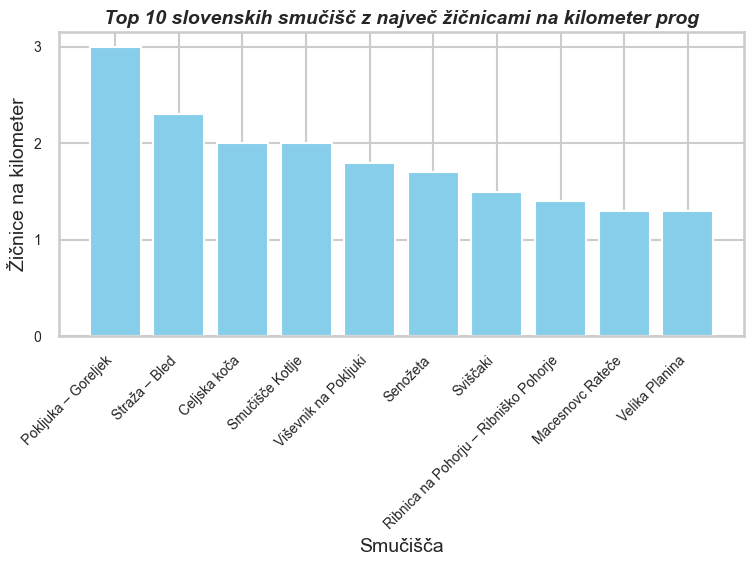

In [1475]:
# graf
plt.figure(figsize=(8, 6))
plt.bar(top_10_smucisca['ime'], top_10_smucisca['razmerje_zicnic_proge'], color='skyblue')
plt.title('Top 10 slovenskih smučišč z največ žičnicami na kilometer prog', fontsize=14, fontweight='bold', style='italic')
plt.xlabel('Smučišča', fontsize=14)
plt.ylabel('Žičnice na kilometer', fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

<h3>4.2 Hipoteze in ugotovitve</h3>

<h4>Hipoteza 1: Slovenska smučišča so slabše ocenjena od smučišč sosednje Avstrije in Italije. Imajo tudi krajše proge.</h4>

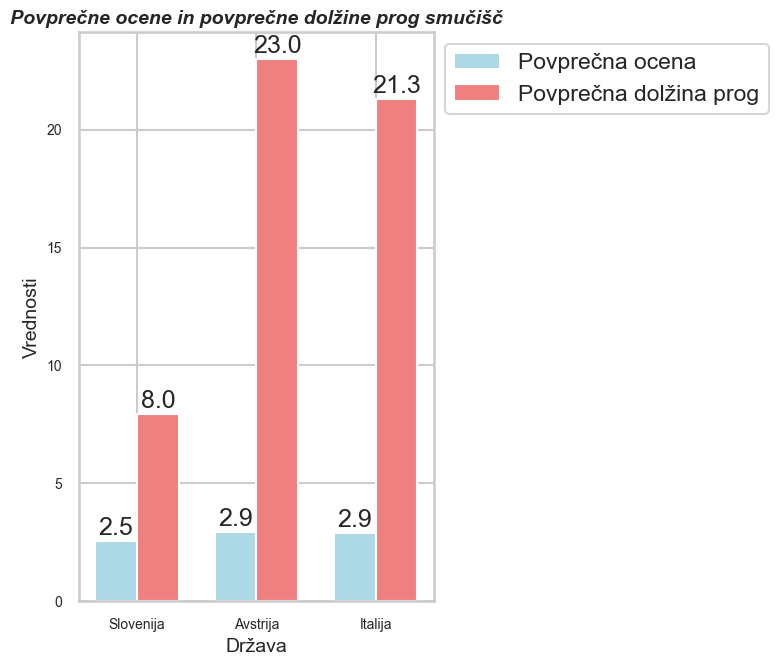

In [1484]:
italijanska_smucisca = smucisca[smucisca['država'] == 'Italy']
avstrijska_smucisca = smucisca[smucisca['država'] == 'Austria']

povprecna_ocena_slovenija = slovenska_smucisca['ocena'].mean()
povprecna_ocena_avstrija = avstrijska_smucisca['ocena'].mean()
povprecna_ocena_italija = italijanska_smucisca['ocena'].mean()

povprecno_proge_slovenija = slovenska_smucisca['proge'].mean()
povprecno_proge_avstrija = avstrijska_smucisca['proge'].mean()
povprecno_proge_italija = italijanska_smucisca['proge'].mean()

drzave = ['Slovenija', 'Avstrija', 'Italija']
povprecne_ocene = [povprecna_ocena_slovenija, povprecna_ocena_avstrija, povprecna_ocena_italija]
povprecno_proge = [povprecno_proge_slovenija, povprecno_proge_avstrija, povprecno_proge_italija]

# Ustvarimo graf
fig, ax = plt.subplots(figsize=(8, 7))

bar_width = 0.35
index = np.arange(len(drzave))

# Narišemo stolpce
ax.bar(index, povprecne_ocene, bar_width, label='Povprečna ocena', color='lightblue')
ax.bar(index + bar_width, povprecno_proge, bar_width, label='Povprečna dolžina prog', color='lightcoral')

# Nastavimo oznake in legendo
ax.set_xlabel('Država', fontsize=14)
ax.set_ylabel('Vrednosti', fontsize=14)
ax.set_title('Povprečne ocene in povprečne dolžine prog smučišč', fontsize=14, fontweight='bold', style='italic')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(drzave)

# Premakni legendo izven grafa
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Dodamo vrednosti nad stolpci
for i in range(len(drzave)):
    ax.text(i, povprecne_ocene[i] + 0.05, round(povprecne_ocene[i], 1), ha='center', va='bottom')
    ax.text(i + bar_width, povprecno_proge[i] + 0.05, round(povprecno_proge[i], 1), ha='center', va='bottom')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Kot je enostavno razvidno iz grafa, je hipoteza _POTRJENA_.

<h4>Hipoteza 2: Povprečna dolžina slovenskih smučišč je pod svetovnim povprečjem.</h4>Slovenska smučišča so načeloma zelo kratka, medtem ko tuja sežejo vse do 600 kilometrov prog.

In [1506]:
svetovno_povprecje = smucisca['proge'].mean()

print(f'Povprečna dolžina slovenskih smučišč je {povprecno_proge_slovenija:.2f} km.')
print(f'Povprečna dolžina vseh smučišč je {svetovno_povprecje:.2f} km.')

Povprečna dolžina slovenskih smučišč je 7.95 km.
Povprečna dolžina vseh smučišč je 15.47 km.


Tudi naša zadnja hipoteza je _POTRJENA_.